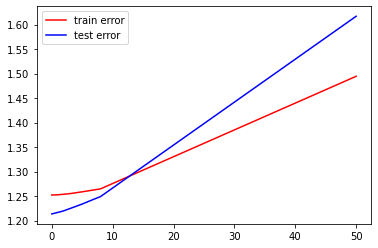

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising.csv")

# Create X and y 
X = df.drop('sales', axis = 1)
y = df['sales']

# Train | Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_absolute_error


# Find training errors and test errors for different lambda/alpha values

train_errors = []
test_errors = []
lambdas = [0, 0.001, 0.002, 0.003, 0.004, 0.008, 0.01, 0.03, 0.1, 0.3, 1, 1.5, 2, 2.5, 3, 3.5, 4,5,6,7, 8, 50]

for i in range (len(lambdas)):
    model = Ridge (alpha = lambdas[i])

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    MAE_train = mean_absolute_error(y_train_pred, y_train)

    y_test_pred = model.predict(X_test_scaled)
    MAE_test = mean_absolute_error(y_test_pred, y_test)

    train_errors.append(MAE_train)
    test_errors.append(MAE_test)

plt.plot(lambdas, train_errors, color = 'red', label = 'train error')
plt.plot(lambdas, test_errors, color = 'blue', label = 'test error')
plt.legend()

# 'train error' should be lower than 'test error', but this is reversed in the low-alpha region
# 'test error' should be high in the low-alpha region, but it starts off near zero.